# LeadQualiScore – Jupyter Walkthrough

Author: **Dhafa Zaidan Ahnaf**  
Submission for Caprae Capital – Machine Learning Engineer Intern Challenge

---

## Import & Load Data

In [10]:
import pandas as pd

#load sample enriched lead data
df = pd.read_csv("./datasets/saasquatch_leads_dummy.csv")
df.head()

,Company,Industry,Street,City,State,Business Type,Employees Count,Revenue,Product/Service Category,BBB Rating,Owner Name,Owner Title,Owner LinkedIn,Owner Email,Owner Phone,Company LinkedIn
0,InnovateHub,SaaS,123 Tech Avenue,San Francisco,CA,LLC,75,15000000.0,AI Analytics,A+,Jane Doe,CEO & Co-Founder,https://linkedin.com/in/janedoe,jane.doe@innovatehub.com,123-456-7890,https://linkedin.com/company/innovatehub
1,DataWeave Solutions,FinTech,456 Data Drive,New York,NY,Corporation,250,50000000.0,Payment Gateway,A,John Smith,Chief Technology Officer,https://linkedin.com/in/johnsmith,j.smith@dataweave.com,NaN,https://linkedin.com/company/dataweave
2,CloudSphere Inc.,Cloud Computing,789 Server Street,Austin,TX,Corporation,500,120000000.0,IaaS,A+,Emily White,Founder,https://linkedin.com/in/emilywhite,emily.w@cloudsphere.com,321-654-0987,https://linkedin.com/company/cloudsphere
3,NextGen Robotics,Hardware,101 Robot Road,Boston,MA,LLC,30,5000000.0,Industrial Automation,B,Michael Brown,NaN,NaN,mbrown@nextgenrobotics.com,NaN,https://linkedin.com/company/nextgenrobotics
4,Healthify,HealthTech,21 Medical Plaza,Chicago,IL,S-Corp,120,25000000.0,Telemedicine,NR,Sarah Green,CEO,https://linkedin.com/in/sarahgreen,sarah.g@healthify.io,987-654-3210,https://linkedin.com/company/healthify


## Scoring Logic with Rule Based

In [12]:
def calculate_score(row):
    score = 0
    ideal_industries = ['SaaS', 'Fintech', 'HealthTech', 'Cloud Computing', 'Cyber Security']
    if pd.notna(row['Industry']) and row['Industry'].strip() in ideal_industries:
        score += 30
    if pd.notna(row['Employees Count']):
        if row['Employees Count'] > 200:
            score += 25
        elif 50 <= row['Employees Count'] <= 200:
            score += 15
        else:
            score += 5
    if pd.notna(row['Revenue']) and isinstance(row['Revenue'], str):
        val = row['Revenue'].replace("$", "").replace("M", "").replace(",", "")
        if val:
            rev = float(val)
            if rev > 20:
                score += 25
            elif rev >= 5:
                score += 15
    if pd.notna(row['Owner Title']):
        title = row['Owner Title'].lower()
        if any(k in title for k in ['ceo', 'founder', 'cto', 'chief']):
            score += 20
    if pd.notna(row['Owner Email']):
        score += 10
    if pd.notna(row['Owner LinkedIn']):
        score += 10
    return score

df['Score'] = df.apply(calculate_score, axis=1)

## Score Distribution Plot

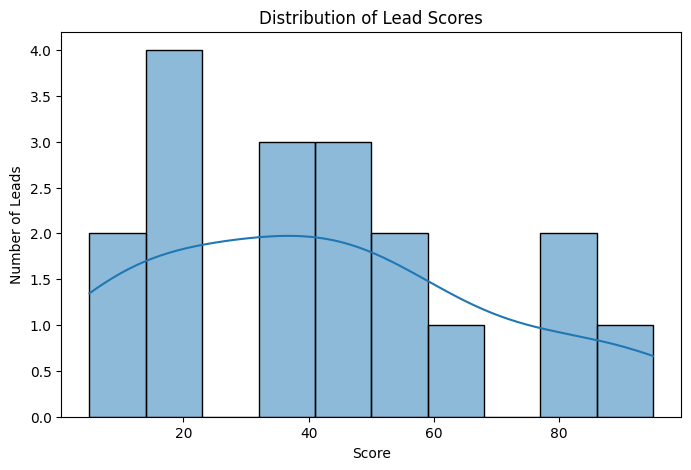

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Score'], bins=10, kde=True)
plt.title("Distribution of Lead Scores")
plt.xlabel("Score")
plt.ylabel("Number of Leads")
plt.show()

## Top Leads Preview

In [15]:
df.sort_values(by='Score', ascending=False).head(5)[['Company', 'Industry', 'Score', 'Revenue', 'Owner Title']]

,Company,Industry,Score,Revenue,Owner Title
2,CloudSphere Inc.,Cloud Computing,95,120000000.0,Founder
0,InnovateHub,SaaS,85,15000000.0,CEO & Co-Founder
4,Healthify,HealthTech,85,25000000.0,CEO
1,DataWeave Solutions,FinTech,65,50000000.0,Chief Technology Officer
15,SmartHome Solutions,IoT,55,18000000.0,Founder & CTO


---

This notebook demonstrates the core logic and reasoning behind the lead scoring system built to enhance SaaSquatchLeads output. The scoring approach is rule-based, interpretable, and designed to reflect real-world sales prioritization heuristics.

In future iterations, this logic can be replaced by a supervised ML model trained on conversion-labeled data.